# EDA of data; Visualisation, stats

Lets try random matrix denoising without the ERC20/721 contract counts

None of the eigenvaleus are identified as noise in this case; RMT denoising will not have any affect on data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib.pyplot import figure

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Gas Price, usage data

In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/Practicum/Github/data/ETH,gas,usage merged 11-26 to 05-26.csv', header=0)
df['datetime'] = pd.to_datetime(df['datetime'], format = '%Y-%m-%d %H:%M')

df = df.sort_values(by='datetime',ascending=False)
df = df.set_index('datetime')
df = df.resample('5T').mean()
df.head()

,gas_used,base_fee_per_gas,transaction_count,size,Open,avg_gas_price,max_gas_price,min_gas_price
datetime,,,,,,,,
2021-11-26 00:00:00,1.611904e+07,83.367975,204.975000,68277.786667,4530.280,97.704391,416.260366,83.929691
2021-11-26 00:05:00,1.564817e+07,96.165048,215.966667,68153.700000,4530.290,109.350360,1068.483575,96.115518
2021-11-26 00:10:00,1.864798e+07,93.115737,225.310000,88584.180000,4534.032,104.415239,551.932718,93.354997
2021-11-26 00:15:00,1.620351e+07,89.745669,209.865000,83455.951667,4537.722,103.576773,364.743749,90.455134
2021-11-26 00:20:00,1.584838e+07,102.513686,198.816667,68416.616667,4518.648,114.184381,364.549751,102.881786


## Contract Count Data

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Practicum/Github/data/Contract counts 2021-11-26 to 2022-05-26', sep=',', index_col=0)
df2['block_timestamp'] = pd.to_datetime(df2['block_timestamp'], format = '%Y-%m-%d %H:%M')
df2 = df2.set_index('block_timestamp')
df2 = df2.resample('5T').sum()
df2.head()

,is_erc20,is_erc721,contracts
block_timestamp,,,
2021-11-26 00:00:00,0,0,30
2021-11-26 00:05:00,0,0,20
2021-11-26 00:10:00,0,0,24
2021-11-26 00:15:00,0,0,34
2021-11-26 00:20:00,0,0,26


#Visualize

In [ ]:
data = df.merge(df2, left_index=True, right_index=True)

In [ ]:
#data['Open_dif'] = data['Open'].diff()

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


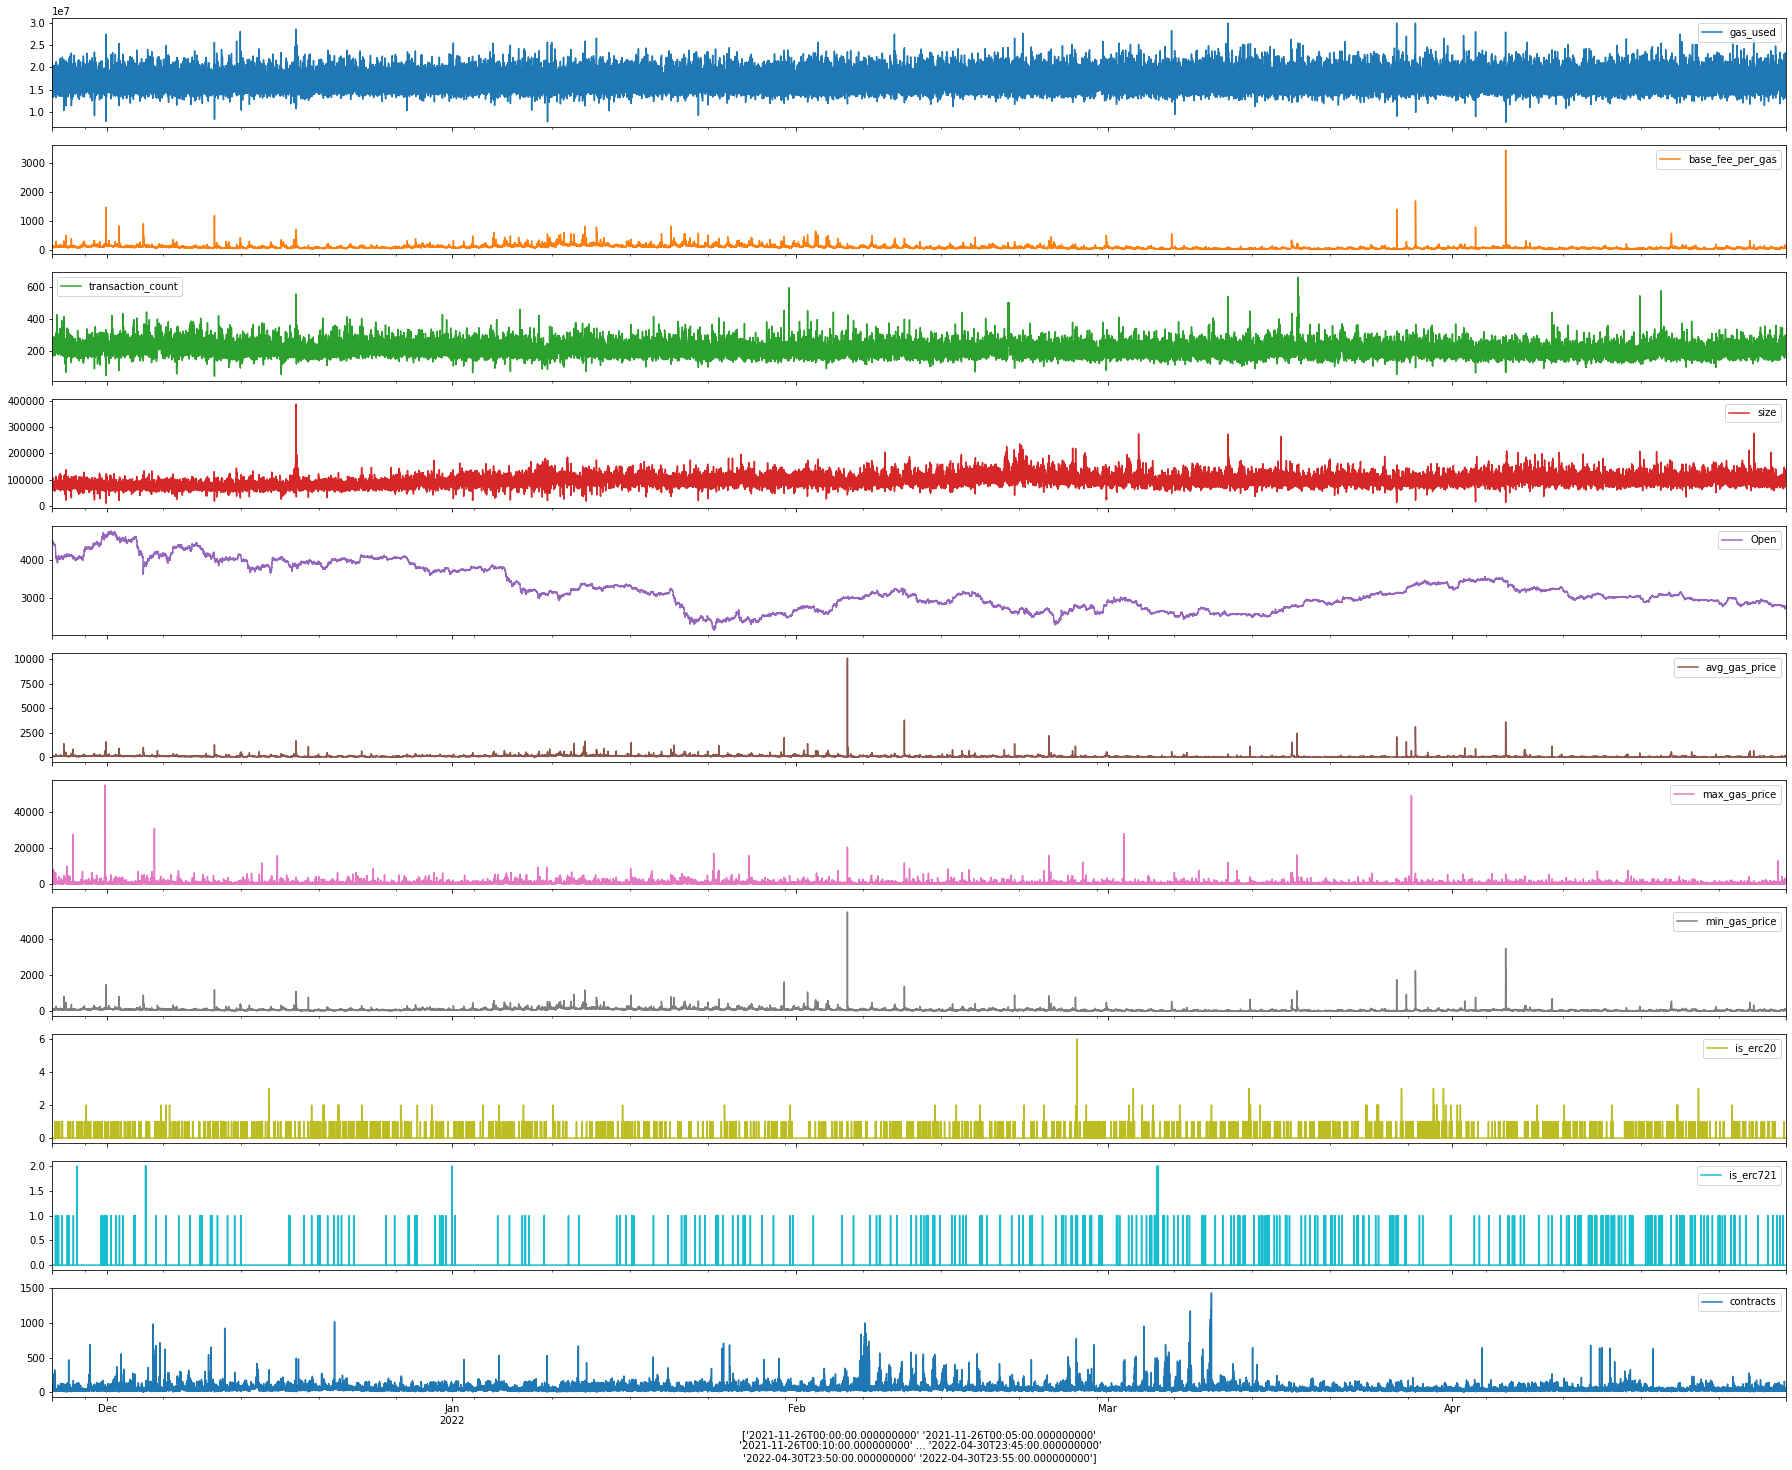

In [ ]:

data.plot(subplots=True, figsize=(25, 20))
plt.tight_layout()
plt.xlabel(data.index.values)
plt.show()

In [ ]:
data = data.drop(['is_erc20', 'is_erc721'], axis=1)

,gas_used,base_fee_per_gas,transaction_count,size,Open,avg_gas_price,max_gas_price,min_gas_price,is_erc20,is_erc721,contracts
2021-11-26 00:00:00,-0.393262,0.064673,0.030650,-1.248972,2.320846,0.071678,-0.073679,0.047374,-0.165427,-0.085942,-0.432909
2021-11-26 00:05:00,-0.627695,0.266914,0.316476,-1.254994,2.320864,0.193887,0.764510,0.213737,-0.165427,-0.085942,-0.628829
2021-11-26 00:10:00,0.865856,0.218724,0.559439,-0.263601,2.327560,0.142100,0.100677,0.176050,-0.165427,-0.085942,-0.550461
2021-11-26 00:15:00,-0.351201,0.165464,0.157809,-0.512449,2.334163,0.133301,-0.139885,0.136460,-0.165427,-0.085942,-0.354541
2021-11-26 00:20:00,-0.528014,0.367246,-0.129490,-1.242236,2.300033,0.244614,-0.140134,0.306111,-0.165427,-0.085942,-0.511277


In [ ]:
def plot_corr(df,size=10):
    """Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    """

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, size=20)
    plt.yticks(range(len(corr.columns)), corr.columns, size=20)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    cbar = fig.colorbar(cax)
    cbar.ax.tick_params(labelsize=20) 
    
  
    


In [ ]:
corr = data.corr()
corr.columns

Index(['gas_used', 'base_fee_per_gas', 'transaction_count', 'size', 'Open',
       'avg_gas_price', 'max_gas_price', 'min_gas_price', 'contracts'],
      dtype='object')

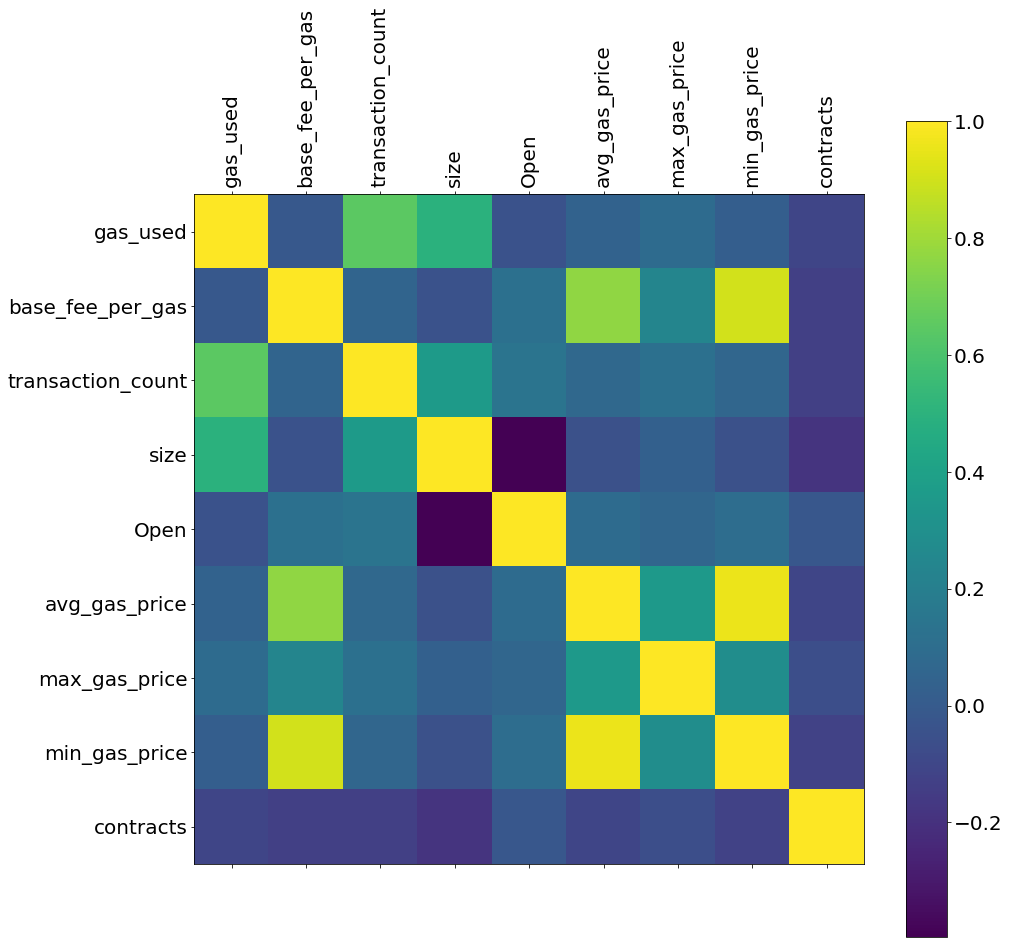

In [ ]:
plot_corr(data, size=15)

# Random Matrix

## Z normalization, define functions

In [ ]:
from scipy.stats import zscore
import pandas as pd
data_z = data

# Z score normailization of data
for i in data.columns:
  data_z[i] = zscore(data_z[i])

data_z

,gas_used,base_fee_per_gas,transaction_count,size,Open,avg_gas_price,max_gas_price,min_gas_price,contracts
2021-11-26 00:00:00,-0.393262,0.064673,0.030650,-1.248972,2.320846,0.071678,-0.073679,0.047374,-0.432909
2021-11-26 00:05:00,-0.627695,0.266914,0.316476,-1.254994,2.320864,0.193887,0.764510,0.213737,-0.628829
2021-11-26 00:10:00,0.865856,0.218724,0.559439,-0.263601,2.327560,0.142100,0.100677,0.176050,-0.550461
2021-11-26 00:15:00,-0.351201,0.165464,0.157809,-0.512449,2.334163,0.133301,-0.139885,0.136460,-0.354541
2021-11-26 00:20:00,-0.528014,0.367246,-0.129490,-1.242236,2.300033,0.244614,-0.140134,0.306111,-0.511277
...,...,...,...,...,...,...,...,...,...
2022-04-30 23:35:00,-0.016017,-0.099764,0.817174,0.355931,-0.907070,-0.089627,0.617626,-0.101258,-0.530869
2022-04-30 23:40:00,1.158162,0.039113,1.418000,1.321039,-0.908934,0.029713,1.375914,0.025679,-0.648421
2022-04-30 23:45:00,-1.854912,0.189786,-0.576670,-1.040942,-0.910094,0.142928,0.798974,0.152738,-0.530869
2022-04-30 23:50:00,1.276039,-0.117022,2.006727,0.836266,-0.897916,0.028230,2.708082,-0.108724,-0.491685


In [ ]:
# credit for this function: Thales Marques, Medium https://medium.com/swlh/an-empirical-view-of-marchenko-pastur-theorem-1f564af5603d

import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity


def mpPDF(var, q, pts):
    """
    Creates a Marchenko-Pastur Probability Density Function
    Args:
        var (float): Variance
        q (float): T/N where T is the number of rows and N the number of columns
        pts (int): Number of points used to construct the PDF
    Returns:
        pd.Series: Marchenko-Pastur PDF
    """
    # Marchenko-Pastur pdf
    # q=T/N
    # Adjusting code to work with 1 dimension arrays
    if isinstance(var, np.ndarray):
        if var.shape == (1,):
            var = var[0]
    eMin, eMax = var * (1 - (1. / q) ** .5) ** 2, var * (1 + (1. / q) ** .5) ** 2
    eVal = np.linspace(eMin, eMax, pts)
    pdf = q / (2 * np.pi * var * eVal) * ((eMax - eVal) * (eVal - eMin)) ** .5
    pdf = pd.Series(pdf, index=eVal)
    return pdf, eMin, eMax

In [ ]:
corr = data_z.corr()

In [ ]:
A = np.random.normal(-1, 1, data.shape)
R = pd.DataFrame(A).corr()

## PCA

Lets test how well we can reconstruct our data from principal components, and get eigenvalues/eigenvectors of the correlation matrix


In [ ]:
## https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com

import sklearn.decomposition

mu = np.mean(data, axis=0)

pca = sklearn.decomposition.PCA()
pca.fit(data)

nComp = 11
Xhat = np.dot(pca.transform(data)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu

print(Xhat[0,])

[-0.39326168  0.06467283  0.03065048 -1.24897226  2.32084635  0.07167798
 -0.07367936  0.04737372 -0.43290886]


In [ ]:
data.head(1)

,gas_used,base_fee_per_gas,transaction_count,size,Open,avg_gas_price,max_gas_price,min_gas_price,contracts
2021-11-26,-0.393262,0.064673,0.03065,-1.248972,2.320846,0.071678,-0.073679,0.047374,-0.432909


In [ ]:
eig_vecs = pca.components_

In [ ]:

eig_vals = pca.explained_variance_
print(eig_vals)

[2.95893312 2.09295335 1.20868111 0.94748541 0.84926182 0.38666354
 0.32814694 0.22008082 0.00799423]


## Denoise Based on Noise-Carrying Components

In [ ]:
#Get eigenvalues boundaries for m*n random matrix 
PDF,evMin, evMax=  mpPDF(1, (len(data_z)/len(data.columns)), 100)


#Get eigenvalues in our data that fall within these boundaries and as such can be considered noise
key_eigvals = []
noise_eigvals = []
for i in eig_vals:
  if  evMin <= i <= evMax:
    noise_eigvals.append(i)
  else:
    key_eigvals.append(i)

#Get eigenvectors that correspond to these noise eigenvalues
noise_eigval_indexes = []
for eig_val in noise_eigvals:
  noise_eigval_indexes.append(eig_vals.tolist().index(eig_val))
noise_eigvecs = eig_vecs[noise_eigval_indexes]  

#Principal components that correspond to the portion of data determined as noise by RMT
Noise_Xhat = np.dot(pca.transform(data)[:,noise_eigval_indexes], pca.components_[noise_eigval_indexes,:])


#Subtract Noise portion of data
a=1 #Degreee of denoising
b=0 #Degree of de-trending(market component, first pricinpal component)
denoised_Xhat = Xhat - a*(Noise_Xhat-b*(np.dot(pca.transform(data)[:,:1], pca.components_[:1,:])))



In [ ]:
pd.DataFrame(denoised_Xhat, columns=data.columns)

,gas_used,base_fee_per_gas,transaction_count,size,Open,avg_gas_price,max_gas_price,min_gas_price,contracts
0,-0.393262,0.064673,0.030650,-1.248972,2.320846,0.071678,-0.073679,0.047374,-0.432909
1,-0.627695,0.266914,0.316476,-1.254994,2.320864,0.193887,0.764510,0.213737,-0.628829
2,0.865856,0.218724,0.559439,-0.263601,2.327560,0.142100,0.100677,0.176050,-0.550461
3,-0.351201,0.165464,0.157809,-0.512449,2.334163,0.133301,-0.139885,0.136460,-0.354541
4,-0.528014,0.367246,-0.129490,-1.242236,2.300033,0.244614,-0.140134,0.306111,-0.511277
...,...,...,...,...,...,...,...,...,...
44923,-0.016017,-0.099764,0.817174,0.355931,-0.907070,-0.089627,0.617626,-0.101258,-0.530869
44924,1.158162,0.039113,1.418000,1.321039,-0.908934,0.029713,1.375914,0.025679,-0.648421
44925,-1.854912,0.189786,-0.576670,-1.040942,-0.910094,0.142928,0.798974,0.152738,-0.530869
44926,1.276039,-0.117022,2.006727,0.836266,-0.897916,0.028230,2.708082,-0.108724,-0.491685


In [ ]:
data.columns




Index(['gas_used', 'base_fee_per_gas', 'transaction_count', 'size', 'Open',
       'avg_gas_price', 'max_gas_price', 'min_gas_price', 'contracts'],
      dtype='object')

In [ ]:
noise_eigval_indexes = []
for eig_val in noise_eigvals:
  noise_eigval_indexes.append(eig_vals.tolist().index(eig_val))

noise_eigvecs = eig_vecs[noise_eigval_indexes]  



we do not have any noise eignevalues!! RMT denoising will do nothing to the data

In [ ]:
noise_eigvecs

array([], shape=(0, 9), dtype=float64)

In [ ]:
Noise_Xhat = np.dot(pca.transform(data)[:,noise_eigval_indexes], pca.components_[noise_eigval_indexes,:])

In [ ]:
a=1
b=0
denoised = pd.DataFrame((Xhat - a*(Noise_Xhat-b*(np.dot(pca.transform(data)[:,:1], pca.components_[:1,:])))), columns=data.columns)

## no changes visible in data

In [ ]:
denoised

,gas_used,base_fee_per_gas,transaction_count,size,Open,avg_gas_price,max_gas_price,min_gas_price,contracts
0,-0.393262,0.064673,0.030650,-1.248972,2.320846,0.071678,-0.073679,0.047374,-0.432909
1,-0.627695,0.266914,0.316476,-1.254994,2.320864,0.193887,0.764510,0.213737,-0.628829
2,0.865856,0.218724,0.559439,-0.263601,2.327560,0.142100,0.100677,0.176050,-0.550461
3,-0.351201,0.165464,0.157809,-0.512449,2.334163,0.133301,-0.139885,0.136460,-0.354541
4,-0.528014,0.367246,-0.129490,-1.242236,2.300033,0.244614,-0.140134,0.306111,-0.511277
...,...,...,...,...,...,...,...,...,...
44923,-0.016017,-0.099764,0.817174,0.355931,-0.907070,-0.089627,0.617626,-0.101258,-0.530869
44924,1.158162,0.039113,1.418000,1.321039,-0.908934,0.029713,1.375914,0.025679,-0.648421
44925,-1.854912,0.189786,-0.576670,-1.040942,-0.910094,0.142928,0.798974,0.152738,-0.530869
44926,1.276039,-0.117022,2.006727,0.836266,-0.897916,0.028230,2.708082,-0.108724,-0.491685


In [ ]:
pd.DataFrame(Xhat, columns=data.columns)

,gas_used,base_fee_per_gas,transaction_count,size,Open,avg_gas_price,max_gas_price,min_gas_price,contracts
0,-0.393262,0.064673,0.030650,-1.248972,2.320846,0.071678,-0.073679,0.047374,-0.432909
1,-0.627695,0.266914,0.316476,-1.254994,2.320864,0.193887,0.764510,0.213737,-0.628829
2,0.865856,0.218724,0.559439,-0.263601,2.327560,0.142100,0.100677,0.176050,-0.550461
3,-0.351201,0.165464,0.157809,-0.512449,2.334163,0.133301,-0.139885,0.136460,-0.354541
4,-0.528014,0.367246,-0.129490,-1.242236,2.300033,0.244614,-0.140134,0.306111,-0.511277
...,...,...,...,...,...,...,...,...,...
44923,-0.016017,-0.099764,0.817174,0.355931,-0.907070,-0.089627,0.617626,-0.101258,-0.530869
44924,1.158162,0.039113,1.418000,1.321039,-0.908934,0.029713,1.375914,0.025679,-0.648421
44925,-1.854912,0.189786,-0.576670,-1.040942,-0.910094,0.142928,0.798974,0.152738,-0.530869
44926,1.276039,-0.117022,2.006727,0.836266,-0.897916,0.028230,2.708082,-0.108724,-0.491685
